# Convolutional Neural Networks with Keras

## Objectives for this Notebook    
* How to use the Keras library to build convolutional neural networks
* Convolutional neural network with one set of convolutional and pooling layers
* Convolutional neural network with two sets of convolutional and pooling layers



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#Import-Keras-and-Packages">Import Keras and Packages</a>   
2. <a href="#Convolutional-Neural-Network-with-One-Set-of-Convolutional-and-Pooling-Layers">Convolutional Neural Network with One Set of Convolutional and Pooling Layers</a>  
3. <a href="#Convolutional-Neural-Network-with-Two-Sets-of-Convolutional-and-Pooling-Layers">Convolutional Neural Network with Two Sets of Convolutional and Pooling Layers</a>  

</font>
</div>


### Install the necessary libraries


Let's start by installing the keras libraries and the packages that we would need to build a neural network.


In [15]:
# All Libraries required for this lab are listed below. The libraries need to be installed on Skills Network Labs. 
# If you run this notebook on a different environment, e.g. your desktop, you may want to install these.
!pip install numpy==2.0.2
!pip install pandas==2.2.2
!pip install tensorflow_cpu==2.18.0
!pip install matplotlib==3.9.2

#### Suppress the tensorflow warning messages


In [16]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Import Keras and Packages


In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

When working with convolutional neural networks in particular, we will need additional packages.


In [18]:
from keras.layers import Conv2D # to add convolutional layers
from keras.layers import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

## Convolutional Neural Network with One Set of Convolutional and Pooling Layers


In [19]:
# import data
from keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.


In [20]:
x_train.shape

(60000, 28, 28)

**comment**: 
- The first number in the output tuple is the number of images in the training data (60000 images)
- The other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.

In [21]:
# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

**comment**: 
- The height represents the number of pixel rows in the image, and the final dimension (1) represents the number of channels for a grayscale image.

Let's normalize the pixel values to be between 0 and 1


In [22]:
x_train = x_train / 255 # normalize training data
x_test = x_test / 255 # normalize test data

Next, let's convert the target variable into binary categories


In [23]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories
print(f"The number of classes are: {num_classes}")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

The number of classes are: 10
y_train shape: (60000, 10)
y_test shape: (10000, 10)


Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.


In [24]:
def convolutional_model():
    
    # create model
    model = Sequential()
    # Input layer: expects 28x28 grayscale images (1 channel)
    model.add(Input(shape=(28, 28, 1))) 
    
    # Convolution layer:
    # - 16 filters
    # - each filter size is 5x5
    # - stride of 1 (move filter one pixel at a time)
    # - ReLU activation adds non-linearity
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu'))
    
    # Max pooling layer:
    # - reduces spatial size by taking max over 2x2 regions
    # - stride of 2 downsamples the feature maps
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Flatten layer:
    # - converts 2D feature maps into a 1D vector
    # - prepares data for fully connected layers
    model.add(Flatten())
    
    # Fully connected (dense) hidden layer with 100 neurons
    model.add(Dense(100, activation='relu'))
    
    # Output layer:
    # - num_classes neurons (e.g., 10 for MNIST)
    # - softmax converts outputs to class probabilities
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

## Train and Test the Network

In [25]:
# build the model
model = convolutional_model()

# fit the model
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)


Epoch 1/10
300/300 - 3s - 9ms/step - accuracy: 0.9128 - loss: 0.3057 - val_accuracy: 0.9656 - val_loss: 0.1227
Epoch 2/10
300/300 - 2s - 6ms/step - accuracy: 0.9729 - loss: 0.0942 - val_accuracy: 0.9789 - val_loss: 0.0667
Epoch 3/10
300/300 - 2s - 6ms/step - accuracy: 0.9813 - loss: 0.0644 - val_accuracy: 0.9827 - val_loss: 0.0542
Epoch 4/10
300/300 - 2s - 6ms/step - accuracy: 0.9855 - loss: 0.0487 - val_accuracy: 0.9851 - val_loss: 0.0449
Epoch 5/10
300/300 - 2s - 6ms/step - accuracy: 0.9877 - loss: 0.0400 - val_accuracy: 0.9868 - val_loss: 0.0406
Epoch 6/10
300/300 - 2s - 6ms/step - accuracy: 0.9899 - loss: 0.0329 - val_accuracy: 0.9859 - val_loss: 0.0432
Epoch 7/10
300/300 - 2s - 6ms/step - accuracy: 0.9916 - loss: 0.0282 - val_accuracy: 0.9867 - val_loss: 0.0394
Epoch 8/10
300/300 - 2s - 6ms/step - accuracy: 0.9932 - loss: 0.0233 - val_accuracy: 0.9851 - val_loss: 0.0454
Epoch 9/10
300/300 - 2s - 6ms/step - accuracy: 0.9942 - loss: 0.0198 - val_accuracy: 0.9880 - val_loss: 0.0354
E

In [29]:

# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f"Train Loss: {scores[0]:.4f},\n Train Accuracy: {scores[1]:.4f} %")
print(f' Error (1- Train Accuracy ): {1 - scores[1]:.4f}')  


Train Loss: 0.0406,
 Train Accuracy: 0.9868 %
 Error (1- Train Accuracy ): 0.0132


------------------------------------------


## Convolutional Neural Network with Two Sets of Convolutional and Pooling Layers


Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.


In [31]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.


In [36]:
# build the model
model = convolutional_model()

# fit the model
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 3s - 9ms/step - accuracy: 0.8444 - loss: 0.5205 - val_accuracy: 0.9564 - val_loss: 0.1487
Epoch 2/10
300/300 - 2s - 7ms/step - accuracy: 0.9628 - loss: 0.1242 - val_accuracy: 0.9723 - val_loss: 0.0874
Epoch 3/10
300/300 - 2s - 7ms/step - accuracy: 0.9738 - loss: 0.0854 - val_accuracy: 0.9790 - val_loss: 0.0679
Epoch 4/10
300/300 - 2s - 7ms/step - accuracy: 0.9792 - loss: 0.0675 - val_accuracy: 0.9810 - val_loss: 0.0591
Epoch 5/10
300/300 - 2s - 7ms/step - accuracy: 0.9830 - loss: 0.0565 - val_accuracy: 0.9835 - val_loss: 0.0503
Epoch 6/10
300/300 - 2s - 7ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9861 - val_loss: 0.0437
Epoch 7/10
300/300 - 2s - 7ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy: 0.9857 - val_loss: 0.0434
Epoch 8/10
300/300 - 2s - 7ms/step - accuracy: 0.9883 - loss: 0.0380 - val_accuracy: 0.9884 - val_loss: 0.0381
Epoch 9/10
300/300 - 2s - 7ms/step - accuracy: 0.9896 - loss: 0.0348 - val_accuracy: 0.9868 - val_loss: 0.0402
E

In [34]:
# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f"Train Loss: {scores[0]:.4f},\n Train Accuracy: {scores[1]:.4f} %")
print(f' Error (1- Train Accuracy ): {1 - scores[1]:.4f}') 

Train Loss: 0.0445,
 Train Accuracy: 0.9844 %
 Error (1- Train Accuracy ): 0.0156


##  Plot the Loss function
We plot the folllowing quantities over the epochs history
- Training Loss is the error measured on the training dataset during training. Reflects how well the model fits the data it has seen.
- Validation Loss is the error measured on a separate validation set not used for training. Reflects generalization to unseen data.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


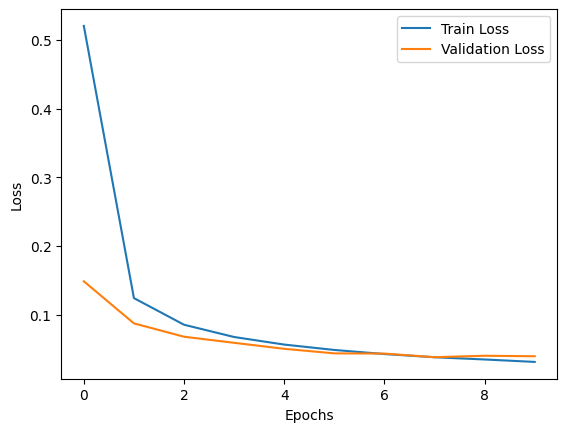

In [37]:
import matplotlib.pyplot as plt
# Plot Loss
print(history.history.keys())
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

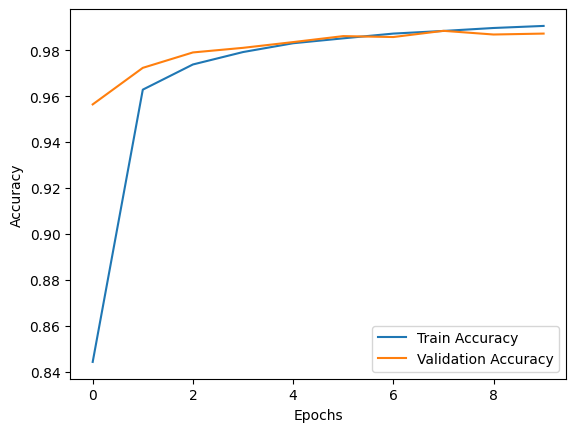

In [38]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()